In [1]:
import pandas as pd
from collections import defaultdict

data processing

In [21]:
def match_real_data(rand_re_df, real_rank):
    rand_re_df['twitter_name1'] = [item.lower() for item in list(rand_re_df.index)]
    intercept = pd.merge(rand_re_df, real_rank, on="twitter_name1", how="inner")
    intercept['rank_trans'] = intercept['rank_x'].rank(method='first')

    intercept = intercept[['twitter_name1', 'party_x', 'rank_y', 'rank_trans']]

    intercept.rename(columns={"rank_y": "rank_real"}, inplace=True)
    return intercept



# match elite_data and ranking results with twitter names

In [22]:

elite_info = pd.read_csv('/Users/lvenbo/Desktop/politics_data/data_anonymization 2!!!/input/elites-data.csv', index_col=0)

elite_info['twitter_name'] = elite_info['twitter_name'].fillna("na").tolist()
elite_info['twitter_name1'] = [item.lower() for item in list(elite_info['twitter_name'])]


In [23]:
elite_info

,id,chamber,stdis,first_name,last_name,party,twitter_name,twitter_id,type,twitter_name1
thomas_id,,,,,,,,,,
1694.0,M001153,Senate,AK,Lisa,Murkowski,R,lisamurkowski,18061669.0,legislator,lisamurkowski
1256.0,Y000033,House,AK,Don,Young,R,repdonyoung,37007274.0,legislator,repdonyoung
1898.0,B001265,Senate,AK,Mark,Begich,D,senatorbegich,83901492.0,legislator,senatorbegich
1548.0,S001141,Senate,AL,Jeff,Sessions,R,senatorsessions,47975734.0,legislator,senatorsessions
1049.0,S000320,Senate,AL,Richard,Shelby,R,senshelby,21111098.0,legislator,senshelby
...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,N,HRC,19608297.0,think tank,hrc
NaN,NaN,NaN,NaN,NaN,NaN,N,RANDCorporation,22545453.0,think tank,randcorporation
NaN,NaN,NaN,NaN,NaN,NaN,N,BrookingsInst,151106990.0,think tank,brookingsinst


In [24]:
merged_df = pd.read_csv('/Users/lvenbo/Desktop/rank_50_40_seed2.csv', index_col=0)
index_lower = [item.lower() for item in list(merged_df.index)]
merged_df['twitter_name1'] = index_lower

In [25]:
new_merge = pd.merge(merged_df, elite_info, on='twitter_name1', how='left' )

In [26]:
merged_df = new_merge

# elite_data,hosue、senate data all contains an id for each politican, use this id to merge them

In [27]:
merged_df.rename(columns={"id": "nameid"}, inplace=True)

In [28]:
# data from house and senate
house_df = pd.read_csv('/Users/lvenbo/Desktop/politics_data/data_anonymization 2!!!/input/house.csv', index_col=0)
senate_df = pd.read_csv('/Users/lvenbo/Desktop/politics_data/data_anonymization 2!!!/input/senate.csv', index_col = 0)

In [29]:
merged_df_h = pd.merge(merged_df, house_df, on="nameid", how="inner")
merged_df_s = pd.merge(merged_df, senate_df, on="nameid", how="inner")
merged_hs = merged_df_h.append(merged_df_s)

In [30]:
merged_hs = merged_hs[['nameid', 'party_x', 'twitter_name1', 'idealPoint']]


In [31]:
merged_hs = merged_hs[merged_hs['nameid'].notna()]  # or df['column_name'].notnull()

In [32]:
merged_hs['rank'] = merged_hs['idealPoint'].rank(method='first')


# use function 'match_real_data' to compare rank1 and dwscore result

In [33]:
rank1 = pd.read_csv('/Users/lvenbo/Desktop/rank_3_40_seed2.csv', index_col=0)

In [47]:
only_seed_2 = pd.read_csv('/Users/lvenbo/Desktop/only_seed_rank.csv', index_col=0)
rank_ori = pd.read_csv('/Users/lvenbo/Desktop/rank_csv_re/rank_1.csv', index_col=0)

In [50]:
only_seed_2.columns = rank_ori.columns

In [60]:
rank1 = rank_ori

In [61]:
re = match_real_data(rank1, merged_hs)

In [62]:
re

,twitter_name1,party_x,rank_real,rank_trans
0,speakerboehner,R,95.0,149.0
1,reppaulryan,R,143.0,120.0
2,nancypelosi,D,17.0,6.0
3,michelebachmann,R,133.0,130.0
4,dwstweets,D,54.0,3.0
...,...,...,...,...
180,randyneugebauer,R,184.0,139.0
181,mcconnellpress,R,160.0,105.0
182,repjimmatheson,D,82.0,89.0
183,senjohnbarrasso,R,178.0,165.0


In [63]:
re.to_csv('/Users/lvenbo/Desktop/compare_rank_ori.csv')

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rbo
from scipy import stats

import os

In [65]:
def func_stas_compare(r1, r2):
    tau, p = stats.kendalltau(r1, r2)
    print('tau:', tau)
    spearman = stats.spearmanr(r1, r2)
    print('spearman:', spearman)
    rboo = rbo.RankingSimilarity(np.array(r1), np.array(r2)).rbo()
    print('rbo:', rboo)
    return tau, spearman, rboo

In [66]:
compare_rank_3 = pd.read_csv('/Users/lvenbo/Desktop/compare_rank_3.csv', index_col=0)

compare_rank_50 = pd.read_csv('/Users/lvenbo/Desktop/compare_rank_50.csv', index_col=0)

In [67]:
compare_rank_seed = pd.read_csv('/Users/lvenbo/Desktop/compare_rank_only_seed.csv', index_col=0)

In [68]:
compare_rank_ori = pd.read_csv('/Users/lvenbo/Desktop/compare_rank_ori.csv', index_col=0)

In [69]:
a, b, c = func_stas_compare(compare_rank_ori['rank_trans'],compare_rank_ori['rank_real'] )

tau: 0.5752056404230318
spearman: SpearmanrResult(correlation=0.7980042454797014, pvalue=4.1586516061973893e-42)
rbo: 0.49495273968682224


In [41]:
a, b, c = func_stas_compare(compare_rank_3['rank_trans'],compare_rank_3['rank_real'] )

tau: 0.6038777908343126
spearman: SpearmanrResult(correlation=0.8163128766915584, pvalue=1.7228392287805642e-45)
rbo: 0.49702746110318063


In [42]:
d, e, f = func_stas_compare(compare_rank_50['rank_trans'],compare_rank_50['rank_real'] )

tau: 0.6238542890716804
spearman: SpearmanrResult(correlation=0.8267351502975627, pvalue=1.3708757764244327e-47)
rbo: 0.5106342751091291


In [59]:
a, b, c = func_stas_compare(compare_rank_seed['rank_trans'],compare_rank_seed['rank_real'] )

tau: 0.618801410105758
spearman: SpearmanrResult(correlation=0.8323376672605284, pvalue=8.905114630139276e-49)
rbo: 0.518833899614878


In [71]:
re_zx = pd.read_csv('/Users/lvenbo/Desktop/rank_csv_re/re_zx.csv', index_col=0)


In [72]:
re_zx

,twitter_name1,party_x,rank_real,rank_trans
0,speakerboehner,R,95.0,91.0
1,reppaulryan,R,143.0,100.0
2,nancypelosi,D,17.0,43.0
3,michelebachmann,R,133.0,124.0
4,dwstweets,D,54.0,53.0
...,...,...,...,...
180,randyneugebauer,R,184.0,138.0
181,mcconnellpress,R,160.0,89.0
182,repjimmatheson,D,82.0,82.0
183,senjohnbarrasso,R,178.0,126.0


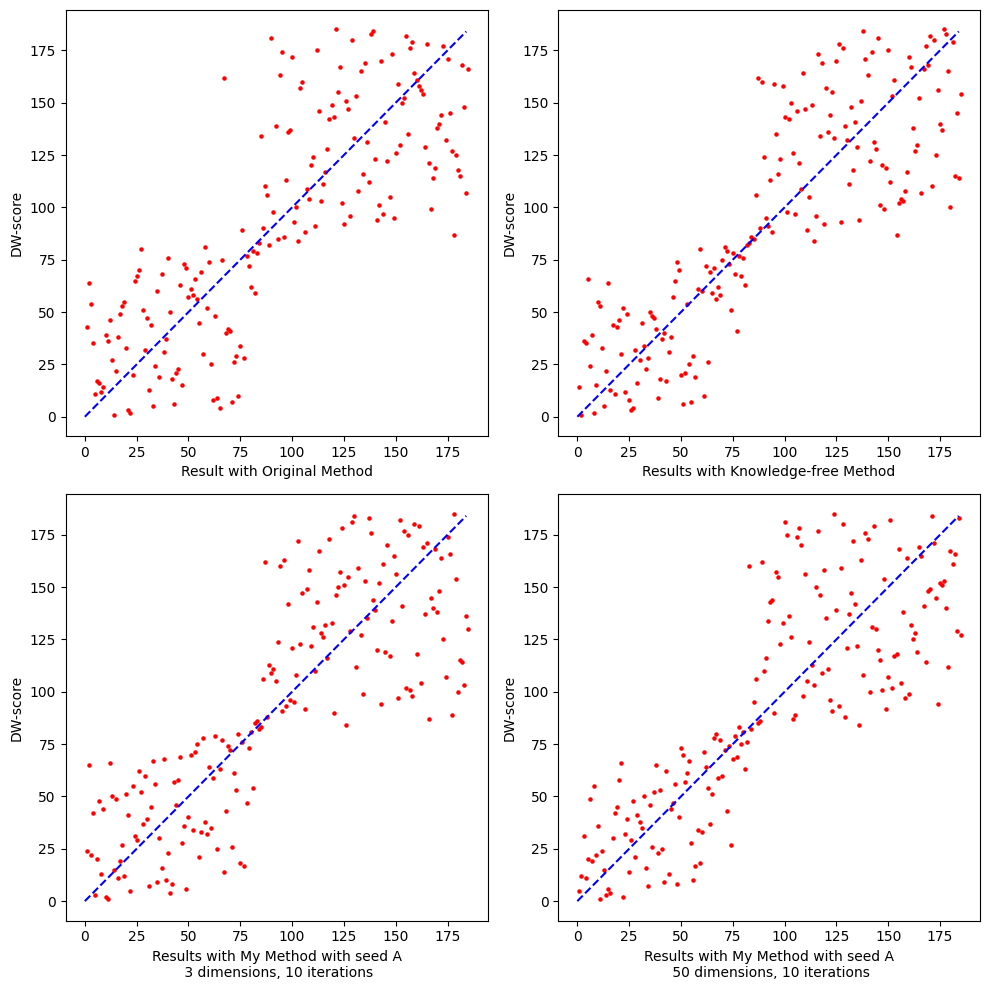

In [76]:
list1 = [i for i in range(len(compare_rank_3))]
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # Adjust figsize as needed

# Plot on the first subplot
axes[0,0].scatter(compare_rank_ori['rank_trans'],compare_rank_ori['rank_real'], s=5, color='r')
axes[0,0].plot(list1, list1, 'b--')
axes[0,0].set_ylabel('DW-score')
axes[0,0].set_xlabel('Result with Original Method')

axes[0,1].scatter(re_zx['rank_trans'], re_zx['rank_real'], s=5, color='r')
axes[0,1].plot(list1, list1, 'b--')
axes[0,1].set_ylabel('DW-score')
axes[0,1].set_xlabel('Results with Knowledge-free Method')

axes[1,0].scatter(compare_rank_3['rank_trans'], compare_rank_3['rank_real'], s=5, color='r')
axes[1,0].plot(list1, list1, 'b--')
axes[1,0].set_ylabel('DW-score')
axes[1,0].set_xlabel('Results with My Method with seed A\n 3 dimensions, 10 iterations')

axes[1,1].scatter(compare_rank_50['rank_trans'], compare_rank_50['rank_real'], s=5, color='r')
axes[1,1].plot(list1, list1, 'b--')
axes[1,1].set_ylabel('DW-score')
axes[1,1].set_xlabel('Results with My Method with seed A\n 50 dimensions, 10 iterations')

plt.tight_layout()
plt.savefig('/Users/lvenbo/Desktop/4_compare.png')
# Show the plots
plt.show()